In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"D:\anlasekon\Python ile Makine Öğrenmesi\BreastCancerWisconsin.csv")
data2 = data.copy()
data2.drop(columns=["id","Unnamed: 32"],axis=1,inplace=True)
data2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data2.diagnosis = [1 if kod=="M" else 0 for kod in data2.diagnosis]

y = data2["diagnosis"]
X = data2.drop(columns="diagnosis",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
data2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)

acs = accuracy_score(y_test,preds)
print(f"Accuracy score: % {acs*100}")

Accuracy score: % 94.73684210526315


Buraya kadar normal uygulanışı burada hiper parametreler veya notlarda anlatılan optimizasyon mantığının hiç biri uygulanmadı sadece varsayılan değerler kullanılan normal bir sınıflandırıcı oluşturduk. İyi bir model oluşturmak için hiperparametreleri uygun değerlerde seçmek daha iyi bir model oluşturmamızı sağlar. Buradan itibaren yeni çalışmamın konusu olacak. Model tuning with KNN. Diyerek devam edeceğim.

In [22]:
acss = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    acss.append(accuracy_score(y_test,preds))

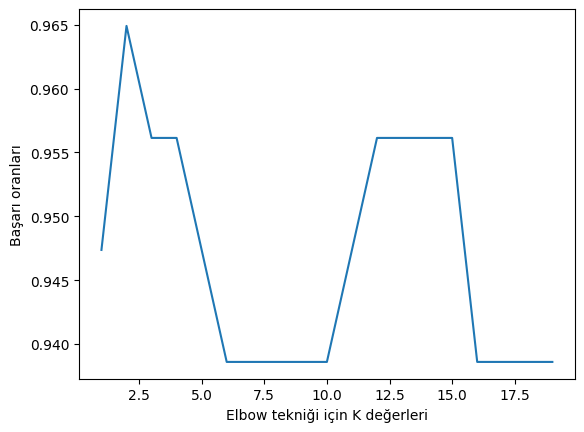

In [7]:
plt.plot(range(1,20),acss)
plt.xlabel("Elbow tekniği için K değerleri")
plt.ylabel("Başarı oranları")
# burada normalde Cost fonksiyonu olmalı ama sklearn de yok o yüzden eklemedim.
# başarı ile de aslında bunu görebiliriz
plt.show()